# Analyzing different kernels for SVM

- We are going to use iris dataset for this example.

- We remove the samples from the third class from the data to turn the problem into a binary classification problem.

- We use only the first two features (from four available features) to be able to do the plots in 2d.

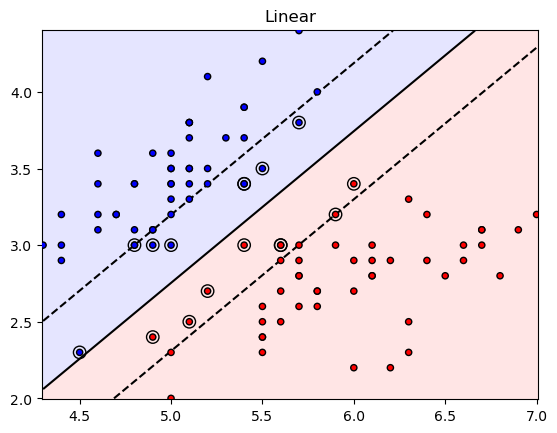

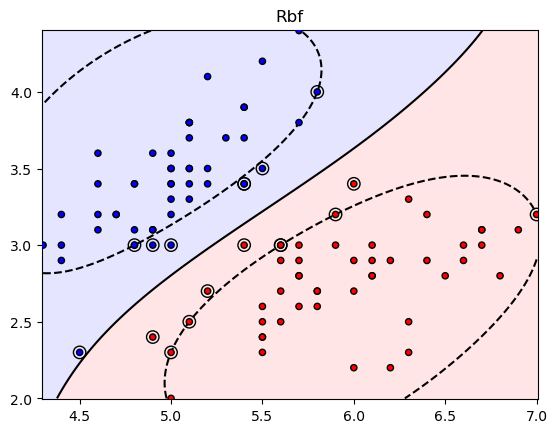

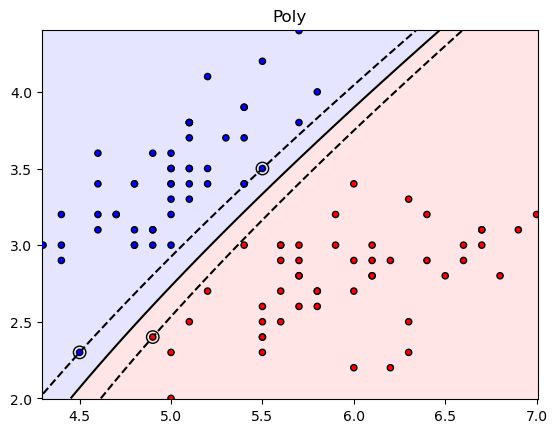

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from matplotlib import cm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2, 0:2]
y = y[y != 2]


for kernel in ["linear", "rbf", "poly"]:
    clf = svm.SVC(kernel=kernel, gamma=1, degree=2)
    clf.fit(X, y)

    plt.figure()
    # plot samples
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, edgecolor="k", s=20, cmap=plt.cm.get_cmap('bwr')
    )
    # plot support vectors
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10, 
        edgecolors="k"
    )

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.get_cmap('bwr'), alpha = 0.1)
    plt.contour(
        XX,
        YY,
        Z,
        colors='k',
        linestyles=['--','-','--'],
        levels=[-1,0,1],
    )
    
    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    plt.title(kernel.title())
plt.show()

## What happens when we increase the value of gamma for rbf kernel?

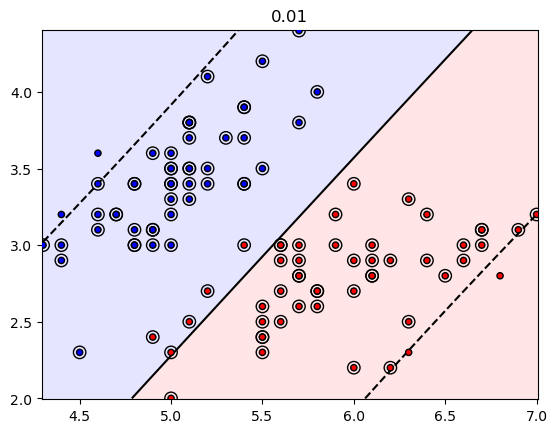

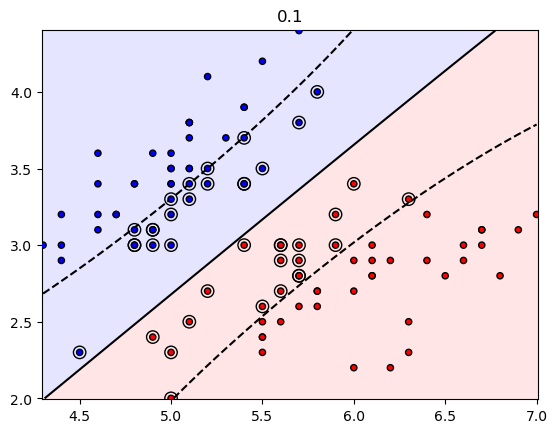

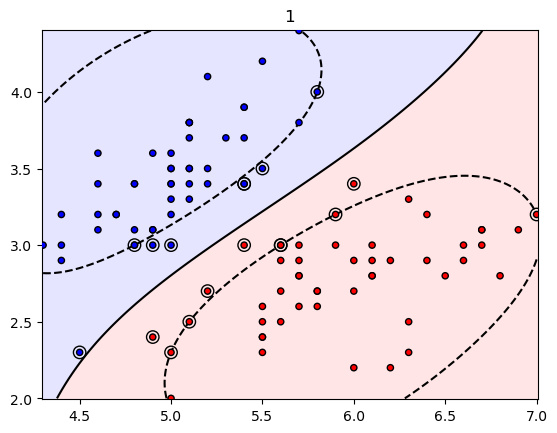

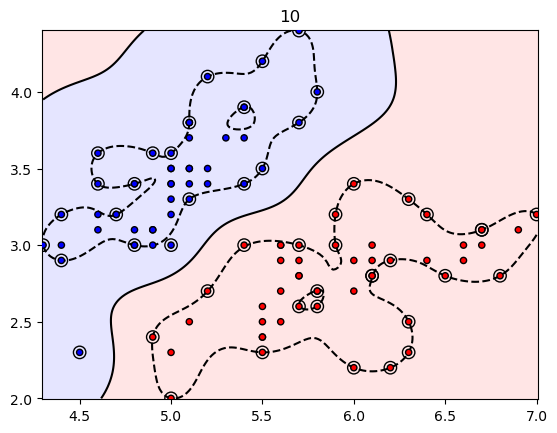

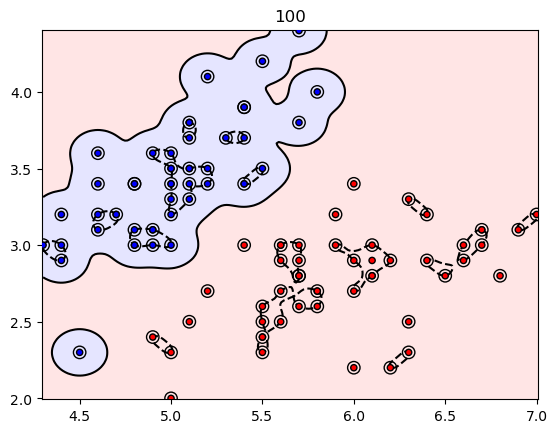

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from matplotlib import cm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2, 0:2]
y = y[y != 2]


for gam in [0.01,0.1,1,10,100]:
    clf = svm.SVC(kernel='rbf', gamma=gam)
    clf.fit(X, y)

    plt.figure()
    # plot samples
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, edgecolor="k", s=20, cmap=plt.cm.get_cmap('bwr')
    )
    # plot support vectors
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10, 
        edgecolors="k"
    )

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.get_cmap('bwr'), alpha = 0.1)
    plt.contour(
        XX,
        YY,
        Z,
        colors='k',
        linestyles=['--','-','--'],
        levels=[-1,0,1],
    )
    
    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    plt.title(str(gam))
plt.show()

We go from underfitting to overfitting!